In [1]:
from skimage import data 
rocket = data.rocket()

In [1]:
# Function to display all images 
import matplotlib.pyplot as plt

def show_image(image, title = 'Image', cmap_type = 'gray'): 
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def show_image_axis(image, title = 'Image', cmap_type = 'gray'): 
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.show()

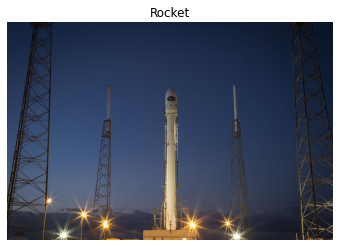

In [5]:
show_image(rocket, 'Rocket')

## Making an image grayscale 

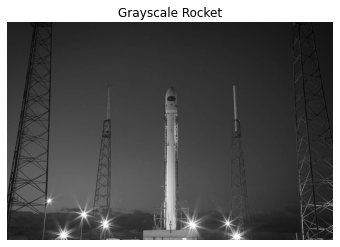

In [6]:
from skimage import color 

grayscale_rocket = color.rgb2gray(rocket)
show_image(grayscale_rocket, 'Grayscale Rocket')

## Images as NdArrays

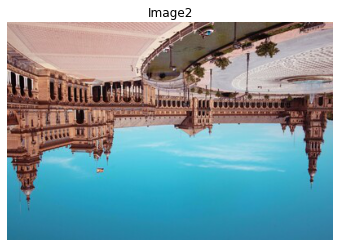

<class 'numpy.ndarray'>


In [11]:
image2 = plt.imread('image_folder/palace.jpg')
show_image(image2, 'Image2')
print(type(image2))

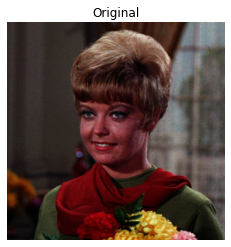

In [14]:
image3 = plt.imread('image_folder/girl.tiff')
show_image(image3, 'Original')

## Breaking down images into RGB 

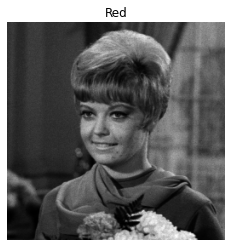

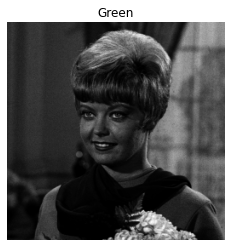

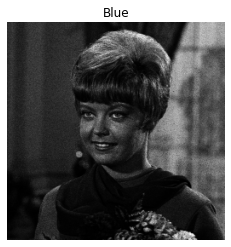

In [15]:
red = image3[:,:,0]
green = image3[:,:,1]
blue = image3[:,:,2]

show_image(red, 'Red')
show_image(green, 'Green')
show_image(blue, 'Blue')

In [16]:
image3.shape

(256, 256, 3)

In [17]:
image3.size

196608

The size is calculated by the multiplying the values of the shape

## Flipping Images

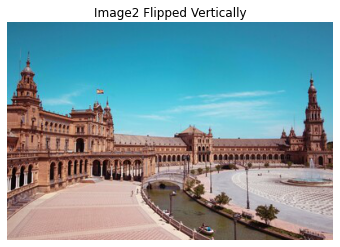

In [19]:
import numpy as np

image2_flipped_up = np.flipud(image2)
show_image(image2_flipped_up, 'Image2 Flipped Vertically')

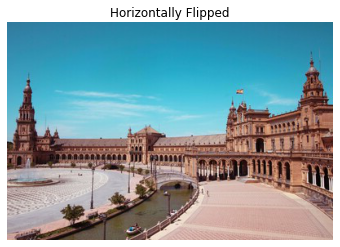

In [20]:
image2_horizontally_flipped = np.fliplr(image2_flipped_up)
show_image(image2_horizontally_flipped, 'Horizontally Flipped')

## Using histograms 

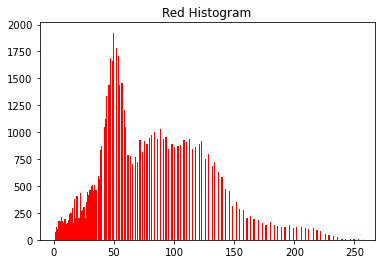

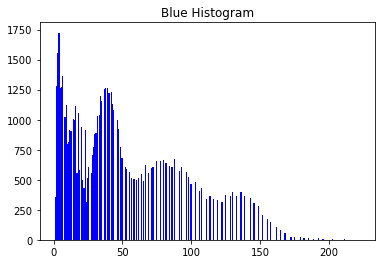

In [22]:
# Using values from the image of the girl

plt.hist(red.ravel(), bins = 256, color = 'r')
plt.title('Red Histogram')
plt.show()

plt.hist(green.ravel(), bins = 256, color = 'g')
plt.title('Green Histogram')
plt.show()

plt.hist(blue.ravel(), bins = 256, color = 'b')
plt.title('Blue Histogram')
plt.show()

## Thresholding 

#### Helps to isolate objects, facial detection, etc.

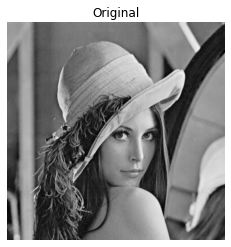

(512, 512)


In [42]:
image4 = plt.imread('image_folder/woman.png')
show_image(image4, 'Original')

print(image4.shape)

In order to apply thresholding, the image must first be turned into black and white so that each pixels value will turn 

white(255) if > thresh 


black (0) if < thresh 

<ipython-input-43-d0aaa16d2064>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image4_gray = color.rgb2gray(image4)


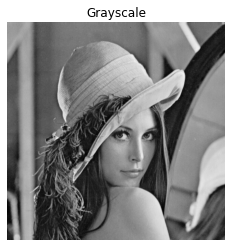

In [43]:
# Not neccessary step because image is already grayscale 
image4_gray = color.rgb2gray(image4)

show_image(image4_gray, 'Grayscale')

In [44]:
image4_gray.shape

(512, 512)

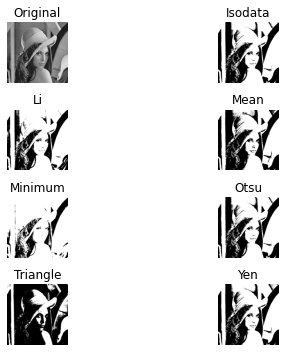

In [47]:
from skimage.filters import try_all_threshold 

fig, ax = try_all_threshold(image4, verbose = False)

plt.show(fig,ax)

## Optimal Thresh Value 

#### Global Thresh - based off all pixels and better for uniform backgrounds

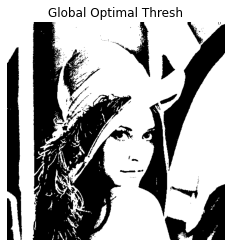

In [55]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image4)

binary = image4 > thresh

binary_invert = image4 <= thresh

show_image(binary, 'Global Optimal Thresh')
show_image(binary_invert, 'Global Optimal Thresh Invert')

#### Local Thresh - based off specified block size and better for uneven backgrounds 

In [58]:
from skimage.filters import threshold_local

block_size = 39

local_thresh = threshold_local(image4, block_size, offset = 10)

binary_local = image4 > local_thresh


## Filtering 

#### Edge Detection 

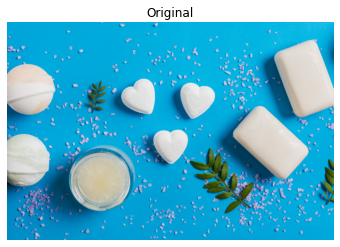

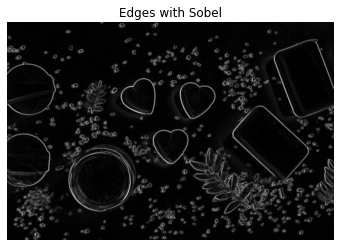

In [60]:
from skimage.filters import sobel 

image5 = plt.imread('image_folder/soap_image.jpg')

show_image(image5, 'Original')

image5 = color.rgb2gray(image5)

image5_sobel = sobel(image5)

show_image(image5_sobel, 'Edges with Sobel')

#### Gaussian Smoothing  - smoothing/softening edges and constrast of phots 

In [62]:
from skimage.filters import gaussian 

image6 = plt.imread('image_folder/building_image.jpg')

show_image(image6, 'Original')

# Multichannel True if colored 
image6_gaussian = gaussian(image6, multichannel = True)

show_image(image6_gaussian, 'Blurred with Gausssian')

# Hard to tell but upper edges of buildings are blurred more smoothly 

## Constrast Enhancement 

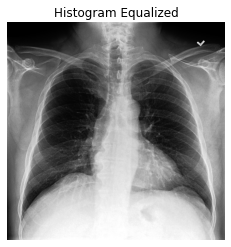

In [4]:
from skimage import exposure 

image7 = plt.imread('image_folder/chest_xray_image.png')

show_image(image7, 'Original')

image_eq = exposure.equalize_hist(image7)

show_image(image_eq, 'Histogram Equalized')

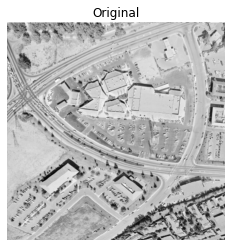

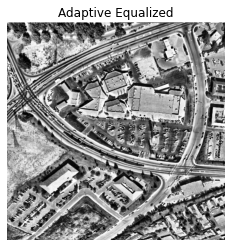

In [6]:
image8 = plt.imread('image_folder/image_aerial.tiff')

show_image(image8, 'Original')

image_adapteq = exposure.equalize_adapthist(image8, clip_limit = .03)

show_image(image_adapteq, 'Adaptive Equalized')

## Transformations

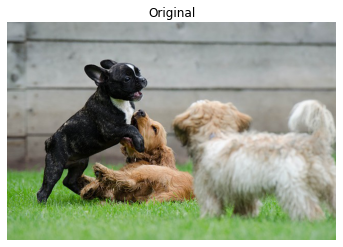

In [9]:
from skimage.transform import rotate 

image9 = plt.imread('image_folder/dogs4.jpg')

show_image(image9, 'Original')

image9_rotated = rotate(image9, -90)

show_image(image9_rotated, 'Rotated 90 Degrees Clockwise')

image9_rotated2 = rotate(image9, 90)

show_image(image9_rotated2, 'Rotated 90 Degrees Counter-Clockwise')

## Rescaling

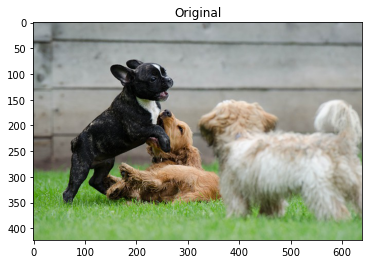

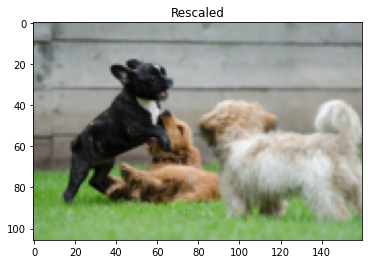

In [12]:
from skimage.transform import rescale 

image_rescaled = rescale(image9, 1/4, anti_aliasing = True, multichannel = True)

show_image_axis(image9, 'Original')
show_image_axis(image_rescaled, 'Rescaled')

## Resizing

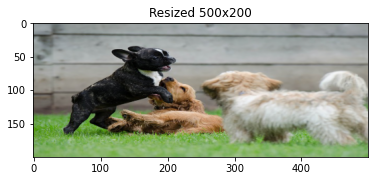

In [14]:
from skimage.transform import resize 

# purposely not proportional
height = 200 
width = 500 

image9_resized = resize(image9, (height,width), anti_aliasing = True)

show_image_axis(image9_resized, 'Resized 500x200')

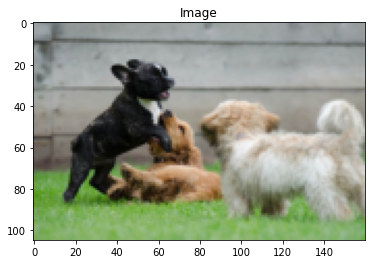

In [17]:
# Proportional resizing 
height = int(image9.shape[0] / 4)
width = int(image9.shape[1]/4)

image_resized = resize(image9, (height,width), anti_aliasing = True)

show_image_axis(image_resized)

## Morphology 


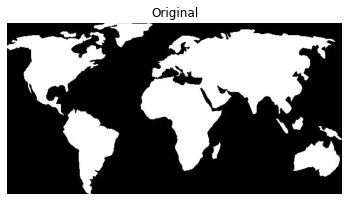

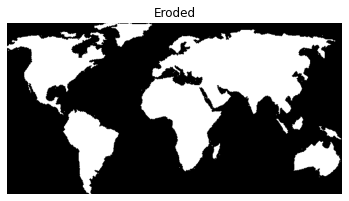

In [21]:
from skimage import morphology 

image10 = plt.imread('image_folder/world_image_binary.jpg')

show_image(image10, 'Original')

eroded_image10 = morphology.binary_erosion(image10)

show_image(eroded_image10, 'Eroded')

dilated_image10 = morphology.binary_dilation(image10)

show_image(dilated_image10, 'Dilated')


## Image Restoration

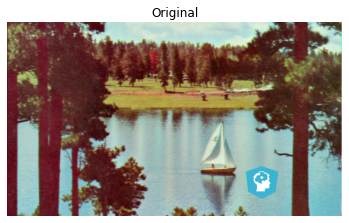

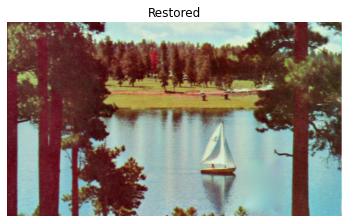

In [4]:
from skimage.restoration import inpaint 
import numpy as np 

defect_image = plt.imread('image_folder/4.2.06_w_logo_2_2.png')

mask = np.zeros(defect_image.shape[:-1])

mask[210:290, 360:425] = 1

restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel = True)

show_image(defect_image, 'Original')
show_image(restored_image, 'Restored')

## Noise

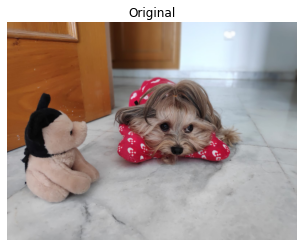

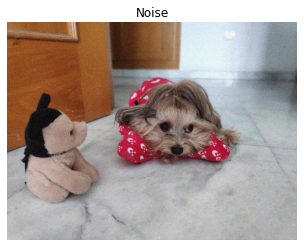

In [5]:
from skimage.util import random_noise 

miny = plt.imread('image_folder/miny.jpeg')

noisy_miny = random_noise(miny)

show_image(miny, 'Original')
show_image(noisy_miny, 'Noise')

In [7]:
# Reducing noise 

from skimage.restoration import denoise_tv_chambolle

forest = plt.imread('image_folder/noise-noisy-nature.jpg')

denoise_forest = denoise_tv_chambolle(forest, weight = .1, multichannel = True)

show_image(forest, 'Noisy')
show_image(denoise_forest, 'Denoised Forest')

## Segmentation 

In [11]:
# Simple Linear Iterative Clustering (SLIC)

from skimage.segmentation import slic 
from skimage.color import label2rgb

coffee = plt.imread('image_folder/coffee_original.png')

segments = slic(coffee, n_segments = 2000)

segmented_image = label2rgb(segments, coffee, kind = 'avg')

show_image(coffee)
show_image(segmented_image, 'Segmented')

<ipython-input-11-d4ff7f4a2def>:8: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(coffee, n_segments = 2000)
<ipython-input-11-d4ff7f4a2def>:10: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, coffee, kind = 'avg')


## Contours

(255, 2)
(221, 2)
(43, 2)
(45, 2)
(41, 2)
(173, 2)
(181, 2)
(43, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)
(45, 2)


<ipython-input-22-93b6e6c42f30>:6: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  dice_img = color.rgb2gray(dice)


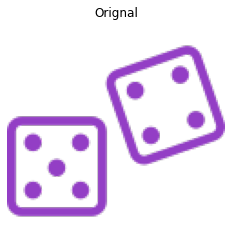

In [22]:
from skimage import color
from skimage.filters import threshold_otsu

dice = plt.imread('image_folder/dices.png')

dice_img = color.rgb2gray(dice)

thresh = threshold_otsu(dice_img)

threshed_image = dice_img > thresh

from skimage import measure 

contours = measure.find_contours(threshed_image, .8)

for contour in contours: 
    print(contour.shape)

show_image(dice, 'Orignal')

In [19]:
# The 9 digits (41-43, 2) represent the 9 dots 

In [64]:
dots_num = [cnt for cnt in contours if np.shape(cnt)[0] < 50]
print("Dice has {} dots".format(len(dots_num)))

Dice has 9 dots


## Canny Edge Detection 

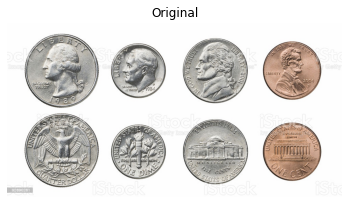

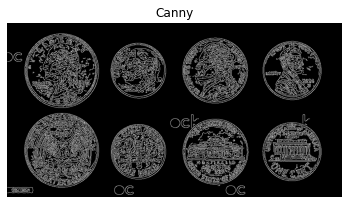

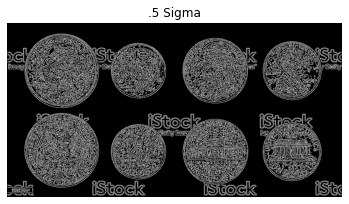

In [25]:
from skimage.feature import canny 

coins = plt.imread('image_folder/istockphoto-92890281-1024x1024.jpg')

bw_coins = color.rgb2gray(coins)

edges = canny(bw_coins)

#sigma testing, default 1
lower_sigma = canny(bw_coins, sigma =.5)

show_image(coins, 'Original')
show_image(edges, 'Canny')
show_image(lower_sigma, '.5 Sigma')

## Corner Detection 

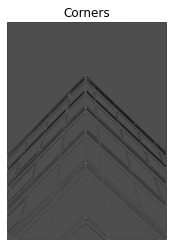

A total of  90 corners were found


<ipython-input-31-51d18893855c>:12: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  coords = corner_peaks(corner_harris(bw_building), min_distance = 5)


In [31]:
from skimage.feature import corner_harris, corner_peaks

building = plt.imread('image_folder/corners_building_top.jpg')

bw_building = color.rgb2gray(building)

corner_image = corner_harris(bw_building)

show_image(building, 'Original')
show_image(corner_image, 'Corners')

coords = corner_peaks(corner_harris(bw_building), min_distance = 5)

print("A total of ", len(coords), "corners were found")

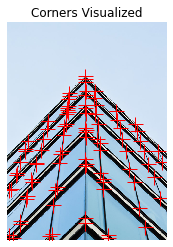

In [32]:
# function to show corners
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()
    
show_image_with_corners(building, coords, title = 'Corners Visualized')

## Facial Recognition 

In [50]:
 # From notes 
def show_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,color='r',linewidth=2)
    ) 
    plt.show()

In [52]:
from skimage.feature import Cascade 

#Load trained file
trained = data.lbp_frontal_face_cascade_filename()

#Initialize detector
detector = Cascade(trained)

image = plt.imread('image_folder/face_det9.jpg')

detected = detector.detect_multi_scale(img = image, 
                                      scale_factor = 1.2, 
                                      step_ratio = 1, 
                                      min_size = (10,10), 
                                      max_size = (200,200))
print(detected)



[{'r': 174, 'c': 234, 'width': 99, 'height': 99}, {'r': 323, 'c': 515, 'width': 105, 'height': 105}]


In [57]:
# From notes 
def getFace(d):
    ''' Extracts the face rectangle from the image using the
    coordinates of the detected.'''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    # Extract the detected face
    face= image[x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    original[ x:width, y:height] =  gaussian_image
    return original

In [ ]:
# Privacy 

from skimage.feature import Cascade
from skimage.filters import gaussian

image2 = plt.imread('image_folder/face_det25.jpg')

detected = detector.detect_multi_scale(img = image2, 
                                      scale_factor = 1.2, 
                                      step_ratio = 1, 
                                      min_size = (50,50),
                                      max_size = (100,100))

for d in detected: 
    # Get faces 
    face = getFace(d)
    #Blur 
    gaussian_face = gaussian(face, multichannel = True, sigma = 10)
    #Layer on 
    result = mergeBlurryFace(image2, gaussian_face)
